<a href="https://colab.research.google.com/github/kpaulfran/trabajo_practico/blob/main/trabajo_practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico - Visualización de Datos

## Nombre: Kevin Paul Franco Moran

In [ ]:
#Instalación de paquetes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Carga de datos desde Google Spreadsheet

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabajo Practico - Data Visualization/goalscorers.csv')
df.tail()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
44105,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,73.0,False,True
44106,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,90.0,False,True
44107,2024-02-11,Ivory Coast,Nigeria,Nigeria,William Troost-Ekong,38.0,False,False
44108,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Franck Kessié,62.0,False,False
44109,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Sébastien Haller,81.0,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#Separamos nuestro dataset entre goles normales y goles por penalty.

df_penalty = df[df.penalty == True]
df_goals = df[df.penalty == False]

In [ ]:
#Top 10  de países con mas goles sin penalties

df_top10paises = df_goals.groupby('team')['scorer'].count()
df_top10paises = pd.DataFrame(df_top10paises)
df_top10paises = df_top10paises.reset_index()
df_top10paises.set_axis(['pais', 'goles'], axis = 'columns', inplace = True)
df_top10paises.sort_values('goles', ascending=False, inplace = True)
df_top10paises = df_top10paises.loc[df_top10paises.index[:10]]
df_top10paises = df_top10paises.reset_index()
df_top10paises.drop('index', axis = 'columns', inplace = True)
df_top10paises

<ipython-input-7-0be1f9fefb74>:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_top10paises.set_axis(['pais', 'goles'], axis = 'columns', inplace = True)


,pais,goles
0,Brazil,982
1,Germany,909
2,Argentina,881
3,Spain,830
4,Netherlands,790
5,Mexico,778
6,Uruguay,746
7,France,717
8,England,707
9,Italy,673


[Text(0, 0, '982'),
 Text(0, 0, '909'),
 Text(0, 0, '881'),
 Text(0, 0, '830'),
 Text(0, 0, '790'),
 Text(0, 0, '778'),
 Text(0, 0, '746'),
 Text(0, 0, '717'),
 Text(0, 0, '707'),
 Text(0, 0, '673')]

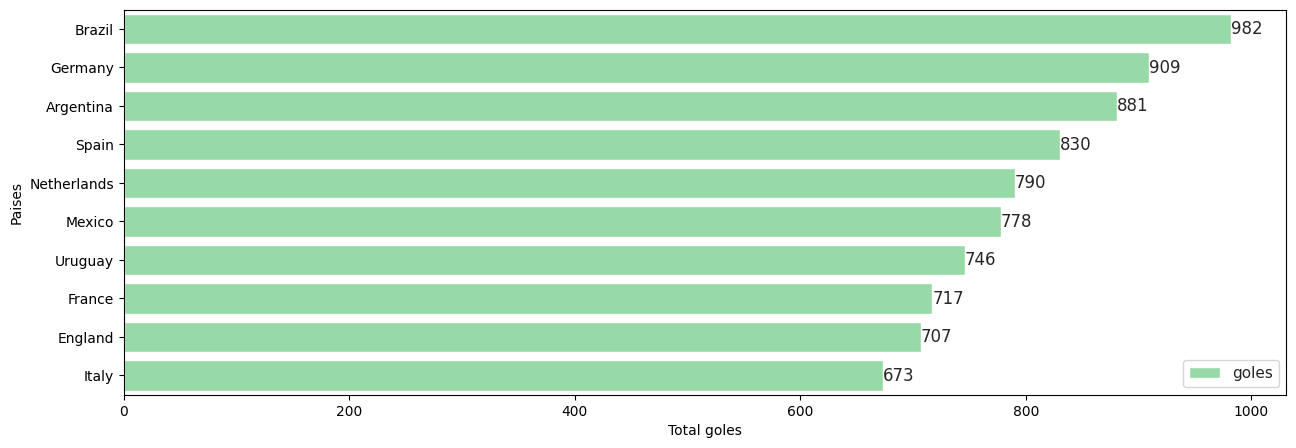

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))
sns.set_theme(style="whitegrid")

# Plot the top 10
sns.set_color_codes("pastel")
sns.barplot(x="goles", y="pais", data=df_top10paises,
            label="goles", color="g")

ax.set(ylabel="Paises",
       xlabel="Total goles")

ax.bar_label(ax.containers[0])

In [ ]:
df_goals['year'] = df_goals['date'].dt.year

<ipython-input-9-2a57524aafa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals['year'] = df_goals['date'].dt.year


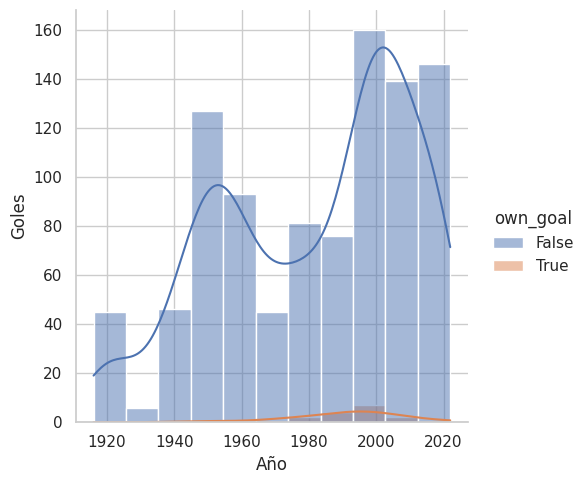

In [ ]:
#Analizar distribucion de goles por año

ax = sns.displot(data=df_goals.loc[df_goals['team']=='Brazil'] , x="year", binwidth = 10, hue ='own_goal', kde = True)

ax.set(xlabel = 'Año', ylabel = 'Goles')


Años en los que Brasil queda campeon de la copa del Mundo en 1958, 1962, 1970, 1994 y 2002

In [ ]:
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 44109
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       41160 non-null  datetime64[ns]
 1   home_team  41160 non-null  object        
 2   away_team  41160 non-null  object        
 3   team       41160 non-null  object        
 4   scorer     41111 non-null  object        
 5   minute     40901 non-null  float64       
 6   own_goal   41160 non-null  object        
 7   penalty    41160 non-null  object        
 8   year       41160 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
mundiales = [1958,1962,1970,1994,2002]
df_mundialesbr = df_goals.loc[(df_goals['team']=='Brazil')]
filter_mundiales = df_mundialesbr['year'].isin(mundiales)
df_mundialesbr = df_mundialesbr[filter_mundiales]
df_mundialesbr['year'].unique()


array([1958, 1962, 1970, 1994, 2002])

In [ ]:
df_goalbr = df_mundialesbr.groupby('year')['scorer'].count()
df_goalbr = pd.DataFrame(df_goalbr)
df_goalbr = df_goalbr.reset_index()
df_goalbr.set_axis(['año', 'goles'], axis = 'columns', inplace = True)
df_goalbr

<ipython-input-26-9b605e801728>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_goalbr.set_axis(['año', 'goles'], axis = 'columns', inplace = True)


,año,goles
0,1958,16
1,1962,14
2,1970,19
3,1994,10
4,2002,16


[Text(0, 0, '16'),
 Text(0, 0, '14'),
 Text(0, 0, '19'),
 Text(0, 0, '10'),
 Text(0, 0, '16')]

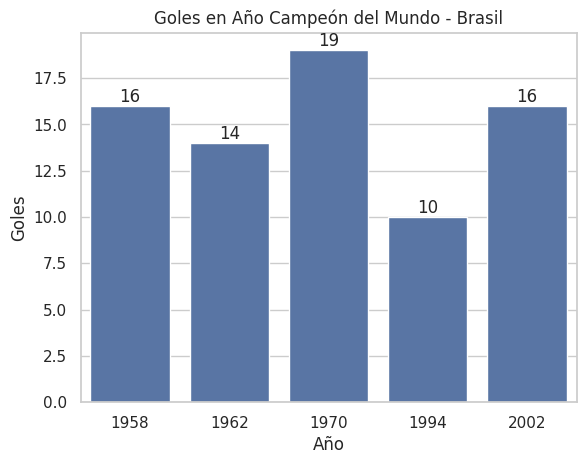

In [ ]:
#Analizar distribucion de goles por año durante los mundiales conseguidos

ax = sns.barplot(data=df_goalbr, x="año", y="goles")
ax.set(xlabel = 'Mundiales', ylabel = 'Goles')

ax.set(title = 'Goles en Año Campeón del Mundo - Brasil',ylabel="Goles",
       xlabel="Año")

ax.bar_label(ax.containers[0])

In [ ]:
df_goalbr['goles'].describe()

count     5.000000
mean     15.000000
std       3.316625
min      10.000000
25%      14.000000
50%      16.000000
75%      16.000000
max      19.000000
Name: goles, dtype: float64

In [ ]:
#Analizemos la selección brasileña 5 campeonatos vs Alemania 4 campeonatos

mundiales_alemania = [1954, 1974, 1990 , 2014]
df_mundialesal = df_goals.loc[(df_goals['team']=='Germany')]
filter_mundialesal = df_mundialesal['year'].isin(mundiales_alemania)
df_mundialesal = df_mundialesal[filter_mundialesal]
df_mundialesal['year'].unique()

array([1954, 1974, 1990, 2014])

In [ ]:
df_goalal = df_mundialesal.groupby('year')['scorer'].count()
df_goalal = pd.DataFrame(df_goalal)
df_goalal = df_goalal.reset_index()
df_goalal.set_axis(['año', 'goles'], axis = 'columns', inplace = True)
df_goalal

<ipython-input-35-a31b8f604f5c>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_goalal.set_axis(['año', 'goles'], axis = 'columns', inplace = True)


,año,goles
0,1954,26
1,1974,14
2,1990,16
3,2014,24


[Text(0, 0, '26'), Text(0, 0, '14'), Text(0, 0, '16'), Text(0, 0, '24')]

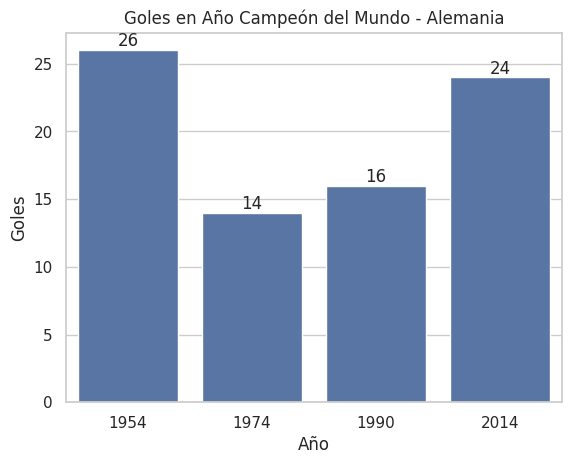

In [ ]:
ax = sns.barplot(data=df_goalal, x="año", y="goles")
ax.set(xlabel = 'Mundiales', ylabel = 'Goles')

ax.set(title = 'Goles en Año Campeón del Mundo - Alemania',ylabel="Goles",
       xlabel="Año")

ax.bar_label(ax.containers[0])

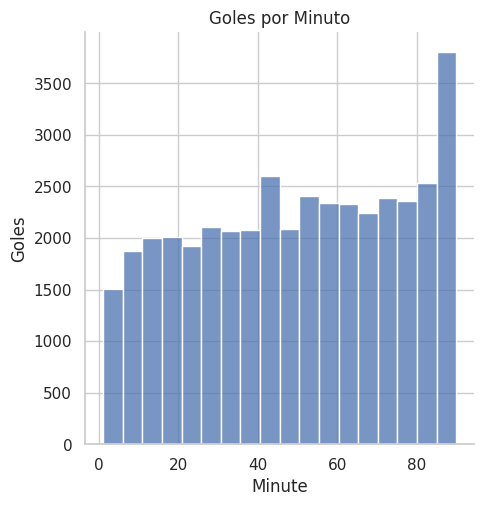

In [ ]:
#Distribuciones de Goles por Minuto dentro de los primeros 90 minutos

ax = sns.displot(data=df_goals.loc[df_goals['minute']<=90]  , x="minute", binwidth = 5)

ax.set(title = 'Goles por Minuto', xlabel = 'Minute', ylabel = 'Goles')
